# Business Problem Understanding

The marketing team of an e-commerce company conducted an email campaign to promote a new feature. A random sample of users was sent emails. Each email had different characteristics (text length, personalization, send time, etc.). The campaign’s success was defined as users clicking on the link inside the email.

 analyze this campaign and provide actionable insights by answering:

1. What percentage of users opened the email and what percentage clicked the link?
2. Can we build a model to increase the probability of users clicking the link?
3. How much can your model improve the click-through rate (CTR)?
4. Are there patterns in email performance across different user segments?

## Data Summary:

- email_table: Info about each sent email (text type, version, time, location, etc.).  
- email_opened_table: Which emails were opened.  
- link_clicked_table: Which emails had the link clicked.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('email_table.csv')
df.head(5)

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [3]:
email_opened = pd.read_csv('email_opened_table.csv')
email_opened.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [4]:
email_opened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10345 entries, 0 to 10344
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  10345 non-null  int64
dtypes: int64(1)
memory usage: 80.9 KB


In [5]:
link = pd.read_csv('link_clicked_table.csv')
link.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [6]:
link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  2119 non-null   int64
dtypes: int64(1)
memory usage: 16.7 KB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [8]:
df['email_text'].value_counts()

email_text
long_email     50276
short_email    49724
Name: count, dtype: int64

In [9]:
df['email_version'].value_counts()

email_version
generic         50209
personalized    49791
Name: count, dtype: int64

In [10]:
df['hour'].value_counts()

hour
9     8529
8     8398
7     8204
10    8180
11    7483
6     7465
5     6551
12    6508
4     5622
13    5581
3     4610
14    4580
2     3676
15    3493
16    2759
1     2703
17    1893
18    1421
19     905
20     656
21     365
22     204
23     145
24      69
Name: count, dtype: int64

In [11]:
df['weekday'].value_counts()

weekday
Saturday     14569
Sunday       14387
Monday       14363
Thursday     14277
Friday       14177
Tuesday      14143
Wednesday    14084
Name: count, dtype: int64

In [12]:
df['user_country'].value_counts()

user_country
US    60099
UK    19939
FR     9995
ES     9967
Name: count, dtype: int64

In [13]:
df['user_past_purchases'].value_counts()

user_past_purchases
0     13877
1     13751
2     13036
3     12077
4     10743
5      9042
6      7518
7      6051
8      4393
9      3296
10     2363
11     1553
12      944
13      578
14      362
15      188
16      102
17       60
18       35
19       15
20       11
21        4
22        1
Name: count, dtype: int64

## Creating new feature target variable 

In [14]:
df['opened'] = df['email_id'].isin(email_opened['email_id']).astype(int)

In [15]:
df['clicked'] = df['email_id'].isin(link['email_id']).astype(int)

In [16]:
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


# EDA

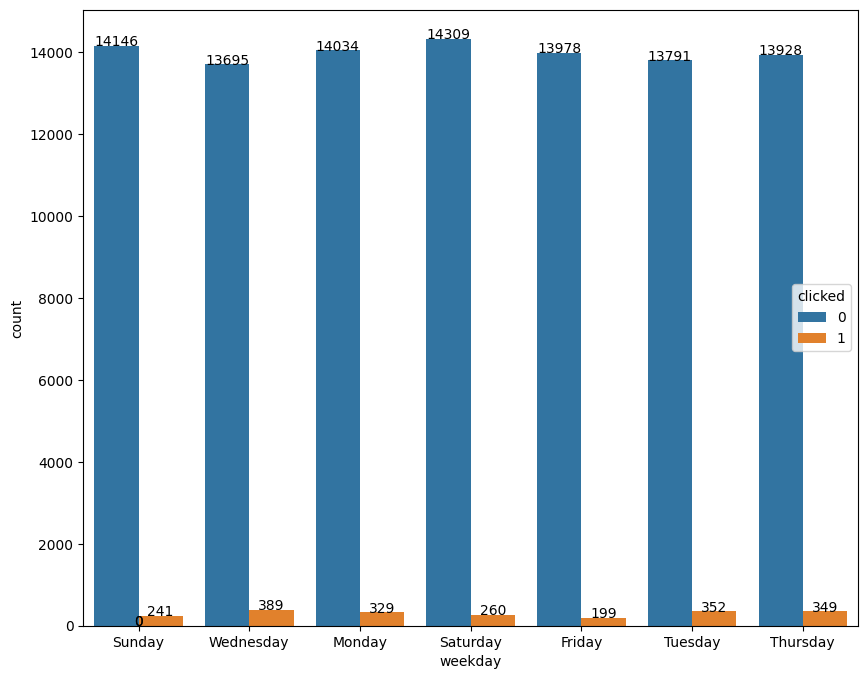

In [17]:
plt.figure(figsize=(10,8))


ax = sns.countplot(x='weekday', hue='clicked', data=df)
[ax.text(p.get_x() + p.get_width()/2, p.get_height() + 0.1, int(p.get_height()), ha='center') for p in ax.patches]

plt.show()

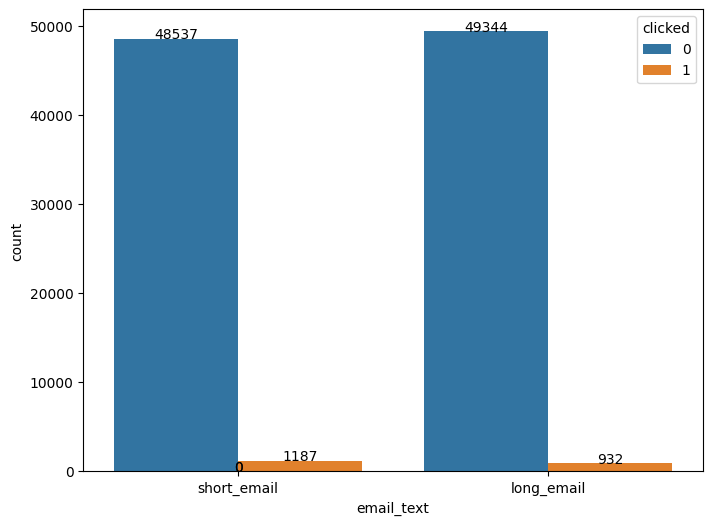

In [18]:
plt.figure(figsize=(8,6))


ax = sns.countplot(x='email_text', hue='clicked', data=df)
[ax.text(p.get_x() + p.get_width()/2, p.get_height() + 0.1, int(p.get_height()), ha='center') for p in ax.patches]

plt.show()

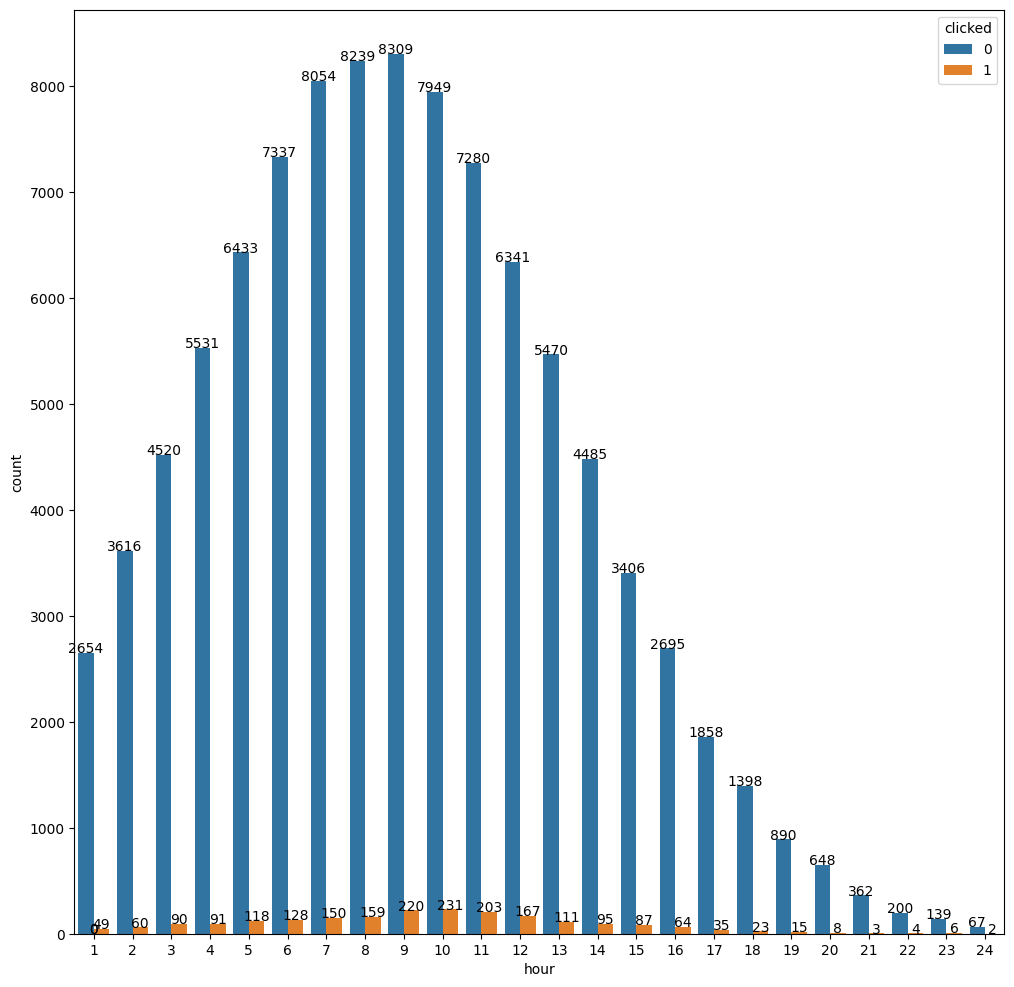

In [19]:
plt.figure(figsize=(12,12))


ax = sns.countplot(x='hour', hue='clicked', data=df)
[ax.text(p.get_x() + p.get_width()/2, p.get_height() + 0.1, int(p.get_height()), ha='center') for p in ax.patches]

plt.show()

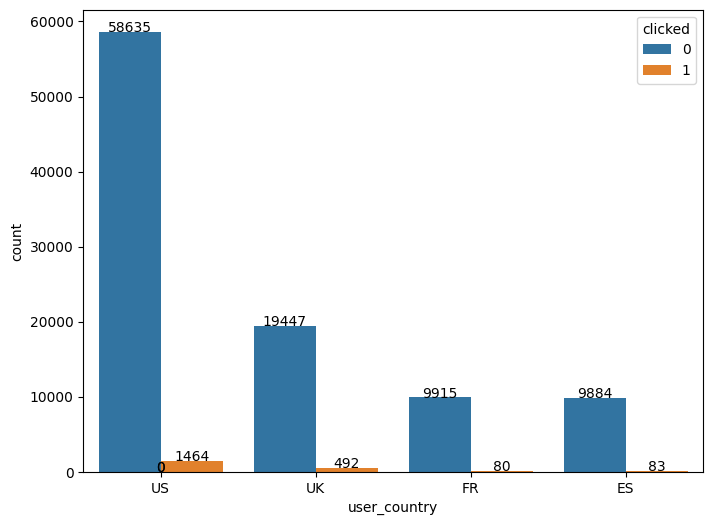

In [20]:
plt.figure(figsize=(8,6))


ax = sns.countplot(x='user_country', hue='clicked', data=df)
[ax.text(p.get_x() + p.get_width()/2, p.get_height() + 0.1, int(p.get_height()), ha='center') for p in ax.patches]

plt.show()

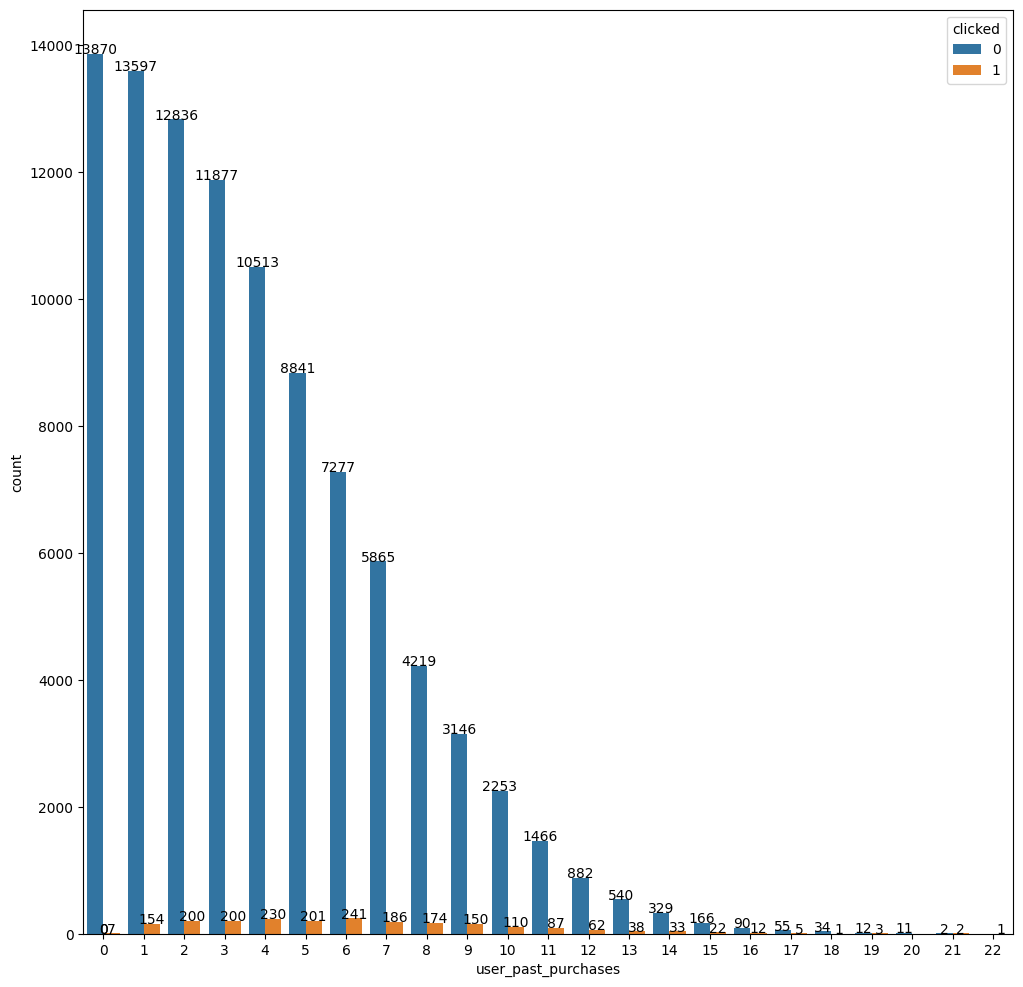

In [21]:
plt.figure(figsize=(12,12))


ax = sns.countplot(x='user_past_purchases', hue='clicked', data=df)
[ax.text(p.get_x() + p.get_width()/2, p.get_height() + 0.1, int(p.get_height()), ha='center') for p in ax.patches]

plt.show()

## key insights

In [52]:
opened_rate = (email_opened.shape[0] / df.shape[0]) * 100
print('Email opened rate percentage : ', opened_rate)

Email opened rate percentage :  5.284478090742841


In [58]:
click_rate = (link.shape[0] / df.shape[0]) * 100
print('User percentage clicked the link : ', click_rate)

User percentage clicked the link :  1.0824368365668515


In [ ]:
Click-through Rate (CTR) among opened emails

In [ ]:
CTR = (Clicked/Opened)* 100

In [59]:
CTR = (link.shape[0] / email_opened.shape[0]) * 100
print('CTR : ', CTR)

CTR :  20.483325277912034


In [22]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Label Encoding for binary categories
le = LabelEncoder()

df_encoded['email_text'] = le.fit_transform(df_encoded['email_text'])         # short_email = 0, long_email = 1
df_encoded['email_version'] = le.fit_transform(df_encoded['email_version']) # generic = 0, personalized = 1

# One-Hot Encoding for non-binary categories
df_encoded = pd.get_dummies(df_encoded, columns=['weekday', 'user_country'], drop_first=True)

df_encoded = df_encoded.astype(int)


In [23]:
df = df_encoded
df.head()

,email_id,email_text,email_version,hour,user_past_purchases,opened,clicked,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,user_country_FR,user_country_UK,user_country_US
0,85120,1,1,2,5,0,0,0,0,1,0,0,0,0,0,1
1,966622,0,1,12,2,1,1,0,0,1,0,0,0,0,1,0
2,777221,0,1,11,2,0,0,0,0,0,0,0,1,0,0,1
3,493711,1,0,6,1,0,0,1,0,0,0,0,0,0,1,0
4,106887,0,0,14,6,0,0,1,0,0,0,0,0,0,0,1


In [24]:
## upsampling
df_minority=df[df['clicked']==1]
df_majority=df[df['clicked']==0]

In [25]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [26]:
df_minority_upsampled.shape

(97881, 16)

In [27]:
df_minority_upsampled['clicked'].value_counts()

clicked
1    97881
Name: count, dtype: int64

In [28]:
df_majority['clicked'].value_counts()

clicked
0    97881
Name: count, dtype: int64

In [29]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [30]:
df_upsampled['clicked'].value_counts()

clicked
0    97881
1    97881
Name: count, dtype: int64

In [31]:
df = df_upsampled

In [32]:
df.head()

,email_id,email_text,email_version,hour,user_past_purchases,opened,clicked,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,user_country_FR,user_country_UK,user_country_US
0,85120,1,1,2,5,0,0,0,0,1,0,0,0,0,0,1
2,777221,0,1,11,2,0,0,0,0,0,0,0,1,0,0,1
3,493711,1,0,6,1,0,0,1,0,0,0,0,0,0,1,0
4,106887,0,0,14,6,0,0,1,0,0,0,0,0,0,0,1
5,684440,0,1,6,3,0,0,0,0,1,0,0,0,0,1,0


In [33]:
# Feature columns (all except email_id, opened, clicked)
feature_cols = [col for col in df.columns if col not in ['email_id', 'opened', 'clicked']]

In [34]:
feature_cols

['email_text',
 'email_version',
 'hour',
 'user_past_purchases',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thursday',
 'weekday_Tuesday',
 'weekday_Wednesday',
 'user_country_FR',
 'user_country_UK',
 'user_country_US']

In [35]:
X = df[feature_cols]
y = df['clicked']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling - XGBoost classifier

In [37]:
from xgboost import XGBClassifier

In [38]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier(importance_type='gain')
param_grid = {'n_estimators': [100,200,300,400,1000],
             'learning_rate':[0.3,0.8,1]}

xgb_grid = GridSearchCV(estimator, param_grid, cv=5)
xgb_grid.fit(X_train,y_train)

xgb=xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [39]:
xgb_grid.best_params_

{'learning_rate': 1, 'n_estimators': 1000}

In [40]:
# Important features

feats_ab = pd.DataFrame(data=xgb.feature_importances_,
                       index=X.columns,
                       columns=['Importance'])

important_features_gb = feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_gb

['email_text',
 'email_version',
 'hour',
 'user_past_purchases',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thursday',
 'weekday_Tuesday',
 'weekday_Wednesday',
 'user_country_FR',
 'user_country_UK',
 'user_country_US']

In [41]:
# Selecting train & test data
X_train_gb = X_train[important_features_gb]
X_test_gb = X_test[important_features_gb]

# Modelling
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

model = xgb_grid.best_estimator_
model.fit(X_train_gb, y_train)

#Predict train data
ypred_train = model.predict(X_train_gb)
print('Train Accuracy :', accuracy_score(y_train,ypred_train))

print('CV Score : ', cross_val_score(model, X_train,y_train, cv=5, scoring='accuracy').mean())

#Predict & Evaluation on test data
ypred_test = model.predict(X_test_gb)
print('Test Accuracy : ', accuracy_score(y_test, ypred_test))

Train Accuracy : 0.9253299618795855
CV Score :  0.9188999320700001
Test Accuracy :  0.9224835900186448


[[16565  2993]
 [   42 19553]]


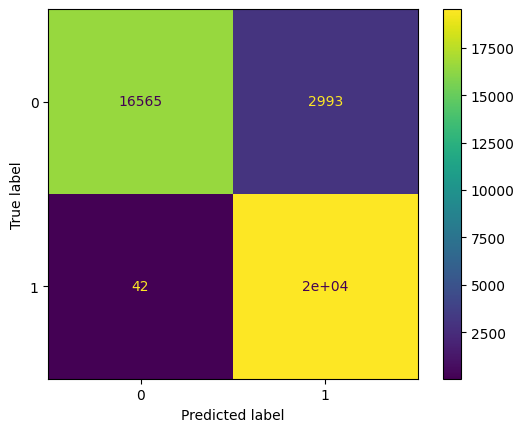

In [42]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,ypred_test)
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

#AUC Score
from sklearn.metrics import roc_auc_score
print('AUC Score : ', roc_auc_score(y_test, ypred_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     19558
           1       0.87      1.00      0.93     19595

    accuracy                           0.92     39153
   macro avg       0.93      0.92      0.92     39153
weighted avg       0.93      0.92      0.92     39153

AUC Score :  0.922412294353855


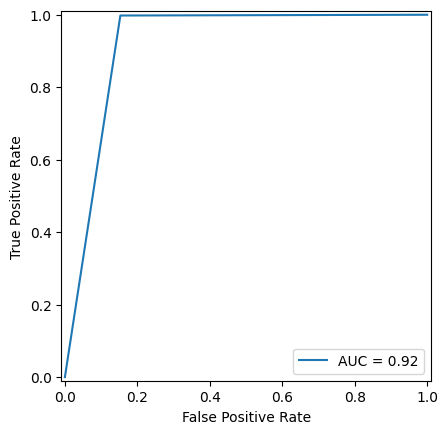

In [44]:
from sklearn.metrics import roc_curve,auc, RocCurveDisplay

fpr,tpr,thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

# Save the model

In [60]:
import pickle

with open('xgboost_email_model.pkl', 'wb') as file:
    pickle.dump(model, file)
